<a href="https://colab.research.google.com/github/TheIndianCoder/Choose-the-best-Optimization-Algorithm-in-keras/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project to choose the best Optimization Algorithm for a given Keras Model ***

Hi, let's get staright to the algorithm to choose algorithm:
        
        For each optimisation algorithm  {
	                     	For i in range(-5,1){
		                                	Run 1 epoch with learning rate 10i 
                                    }
                       Choose the value of i which gives the best result
                       Run 50 epochs with the 10i as learning rate and store results.
                }
        Compare the results and choose the best performer. 


Here, as proof of concept, we show the results of our algorithm on the[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html).



# Now, 
  There are 7 optimization Algorithms we're concerned with becasue they are present in the    [Keras.Optimizers](https://keras.io/optimizers/) class. Namely
   
   1. [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
   
   2. [RMS Prop](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)
   
   3.  [ADAGRAD](https://arxiv.org/abs/1705.08292)
  
   4. [ADADELTA](https://arxiv.org/abs/1212.5701)
  
   5. [ADAM](https://arxiv.org/abs/1412.6980)
   
   6. [ADAMAX](https://arxiv.org/abs/1412.6980)
   
   7. [NADAM](http://cs229.stanford.edu/proj2015/054_report.pdf)
   
# As an example
We use the following CNN model as described [here](https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/ ):

![](https://github.com/TheIndianCoder/Choose-the-best-Optimization-Algorithm-in-keras/blob/master/utils/images/git1.png?raw=true)

   

# Step 1
  
  Lets import the required libraries

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  5 09:45:29 2018

@author: AMY
"""
import pandas as pd
import numpy
import keras
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from sklearn.model_selection import train_test_split
#from "C:\Users\AMY\Desktop\Algo project" import cifar10 as cifar10
from matplotlib import pyplot
from scipy.misc import toimage

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras import optimizers
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import time

Using TensorFlow backend.


# Step 2

1. Import the **CIFAR 10 dataset**:

2. Although the dataset has 60,000 images, we reuire only 20,000 for demonstration purpose

3. Also, we reshape the input dataset to divide it into **X_train ,y_train,X_test and y_test**




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


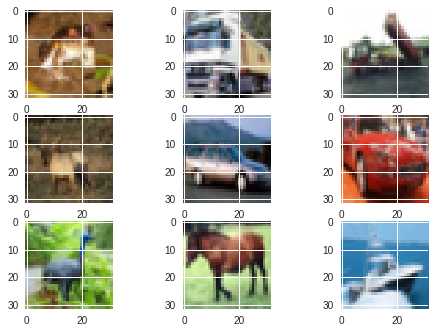

shapes: Xtrain  (20000, 3, 32, 32)  Y_train : (20000, 10)  Xtest  (2000, 3, 32, 32)  Y_test : (2000, 10)


In [6]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


# create a grid of 3x3 images
for i in range(0, 9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(toimage(X_train[i]))
  
# show the plot
pyplot.show()
# Simple CNN model for CIFAR-10

K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)



# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


#Reshaaping the 50,000 examples to 4096 for train and 500 for test
X_train=X_train[0:20000,:,:,:]
y_train=y_train[0:20000,:]
X_test=X_test[0:2000,:,:,:]
y_test=y_test[0:2000,:]
print("shapes: Xtrain ",X_train.shape," Y_train :",y_train.shape," Xtest ",X_test.shape," Y_test :",y_test.shape)


**Output**:
The output should contain the following images as an indication that the dataset has been loaded and is ready to use:
![alt text](https://github.com/TheIndianCoder/Choose-the-best-Optimization-Algorithm-in-keras/blob/master/utils/images/output1.PNG?raw=true)


# Step 3
 **Create CNN models for each of the 7 optimization algorithms**
  
   Each moel returns the accuracy, time taken and a [Keras History object](https://keras.io/callbacks/#history) which we'll need to plot the graphs.

In [0]:
# Create the model
def ConvModel_SGD(alpha=0.01,epochs=1,loss_fun='categorical_crossentropy'):
    print("\nUsing SGD with alpha : ",alpha)
    
    start=time.time()
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    lrate = alpha
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    #print(model.summary())
    
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    end=time.time()
    
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    return [scores[1]*100,(end-start),hist]

def ConvModel_RMS(alpha=0.01,epochs=1,loss_fun='categorical_crossentropy'):
    print("\nUsing RMS with alpha : ",alpha)
    
    start=time.time()
    
    RMS=keras.optimizers.RMSprop
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    lrate = alpha
    decay = lrate/epochs
    rms=RMS(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
   
  # print(model.summary())
    
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    end=time.time()
    
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    return [scores[1]*100,(end-start),hist]


  
def ConvModel_ADAGrad(alpha=0.01,epochs=1):
    print("\nUsing ADAGrad with alpha : ",alpha)
    start=time.time()
    ADAGRAD=keras.optimizers.Adagrad
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADA=ADAGRAD(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADA, metrics=['accuracy'])
   # print(model.summary())
    
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    
    print("Accuracy: %.2f%%" % (scores[1]*100))
    #print("Scores shape :",scores.shape)
    
    end=time.time()
    
    return [scores[1]*100,(end-start),hist]


  
def ConvModel_ADADelta(alpha=0.01,epochs=1):
    print("\nUsing ADDelta with alpha : ",alpha)
    start=time.time()
    
    ADADEL=keras.optimizers.Adadelta
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADADEL=ADADEL(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADADEL, metrics=['accuracy'])
    
    #print(model.summary())
    
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    
    # Final evaluation of the model
    
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    end=time.time()
    
    return [scores[1]*100,(end-start),hist]
#ConvModel_ADADelta()


def ConvModel_ADAM(alpha=0.01,epochs=1):
    print("\nUsing ADAM with alpha : ",alpha)
    start=time.time()
    
    ADAM=optimizers.Adam
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADAM=ADAM(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])
    
    #print(model.summary())
    # Fit the model
    
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    end=time.time()
    
    return [scores[1]*100,(end-start),hist]
#ConvModel_ADAM()



def ConvModel_ADAMAX(alpha=0.01,epochs=1):

    print("\nUsing ADAMAX with alpha : ",alpha)
    start=time.time()
    
    ADAMAX=keras.optimizers.Adamax
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    decay = lrate/epochs
    ADAMAX=ADAMAX(lr=lrate,decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=ADAMAX, metrics=['accuracy'])
    #print(model.summary())
    
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    end=time.time()
    
    return [scores[1]*100,(end-start),hist]
  
  #ConvModel_ADAMAX()

  
def ConvModel_NADAM(alpha=0.01,epochs=1):
    
    print("\nUsing NADAM with alpha : ",alpha)
    start=time.time()
    
    NADAM=optimizers.Nadam
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    
    lrate = alpha
    NADAM=NADAM(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=NADAM, metrics=['accuracy'])
   # print(model.summary())
    
    # Fit the model
    hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
    
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    end=time.time()
    return [scores[1]*100,(end-start),hist]

After Compiling the models successfully, we now decide which **learning rate to choose for each Optimization algorithm** we choose the best from
                        
                        [0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10] 


   by     **training each model for one epoch and comparing the results**

In [0]:
'''
  Choose the best learning rates for each Algorithm by passing through one epoch each

'''
def CompareAlgos_alpha():
    lr_list=[0.00001,0.0001,0.001,0.001,0.01,0.1,1,10]
    '''
      every algorithm in the deictionary has corresponding two values in the list : accuracy and time
      
      100*accuracy  - time_spent is used as a metric here to compare the results of different learning rates for each Algorithm. The reader is free to use another metric
    '''
    result_lr_list={'SGD':[0,0],'NADAM':[0,0],'ADAMAX':[0,0],'RMS':[0,0],'ADAM':[0,0],'ADAGrad':[0,0],'ADADelta':[0,0]}
    
    
    for i in lr_list:
        print("Calling SGD with lr= ",i)
        [acc,time_spent,_]=ConvModel_SGD(alpha=i)
        if(result_lr_list['SGD'][0]<(100*acc-time_spent)):
            result_lr_list['SGD'][0]=100*acc-time_spent
            result_lr_list['SGD'][1]=i
    
    for i in lr_list:
        print("Calling RMS with lr= ",i)
        [acc,time_spent,_]=ConvModel_RMS(alpha=i)
        if(result_lr_list['RMS'][0]<(100*acc-time_spent)):
            result_lr_list['RMS'][0]=100*acc-time_spent
            result_lr_list['RMS'][1]=i
   
    for i in lr_list:
        print("Calling ADAGrad with lr= ",i)
        [acc,time_spent,_]=ConvModel_ADAGrad(alpha=i)
        if(result_lr_list['ADAGrad'][0]<(100*acc-time_spent)):
            result_lr_list['ADAGrad'][0]=100*acc-time_spent
            result_lr_list['ADAGrad'][1]=i

    for i in lr_list:
        print("Calling ADADelta with lr= ",i)
        [acc,time_spent,_]=ConvModel_ADADelta(alpha=i)
        if(result_lr_list['ADADelta'][0]<(100*acc-time_spent)):
            result_lr_list['ADADelta'][0]=100*acc-time_spent
            result_lr_list['ADADelta'][1]=i
            
    for i in lr_list:
        print("Calling ADAM with lr= ",i)
        [acc,time_spent,_]=ConvModel_ADAM(alpha=i)
        if(result_lr_list['ADAM'][0]<(100*acc-time_spent)):
            result_lr_list['ADAM'][0]=100*acc-time_spent
            result_lr_list['ADAM'][1]=i
    
    for i in lr_list:
        print("Calling ADAMAX with lr= ",i)
        [acc,time_spent,_]=ConvModel_ADAMAX(alpha=i)
        if(result_lr_list['ADAMAX'][0]<(100*acc-time_spent)):
            result_lr_list['ADAMAX'][0]=100*acc-time_spent
            result_lr_list['ADAMAX'][1]=i
    
    for i in lr_list:
        print("Calling NADAM with lr= ",i)
        [acc,time_spent,_]=ConvModel_NADAM(alpha=i)
        if(result_lr_list['NADAM'][0]<(100*acc-time_spent)):
            result_lr_list['NADAM'][0]=100*acc-time_spent
            result_lr_list['NADAM'][1]=i
    print(result_lr_list)
    return result_lr_list

We call the above function to get the best learning rates for each Algorithm.

In [9]:
result_lr=CompareAlgos_alpha()

Calling SGD with lr=  1e-05

Using SGD with alpha :  1e-05
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 6s 322us/step - loss: 2.3520 - acc: 0.1077 - val_loss: 2.3174 - val_acc: 0.1025
Accuracy: 10.25%
Calling SGD with lr=  0.0001

Using SGD with alpha :  0.0001
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 4s 189us/step - loss: 2.2946 - acc: 0.1256 - val_loss: 2.2750 - val_acc: 0.1565
Accuracy: 15.65%
Calling SGD with lr=  0.001

Using SGD with alpha :  0.001
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 4s 195us/step - loss: 2.2142 - acc: 0.1735 - val_loss: 2.0848 - val_acc: 0.2860
Accuracy: 28.60%
Calling SGD with lr=  0.001

Using SGD with alpha :  0.001
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 4s 199us/step - loss: 2.2454 - acc: 0.1618 - va

# Step 4:
  Now that we have the ebst learning rates.,
        we choose the best optimization algorithm among the seven.
    
   **For this , we create the function CompareAlgos_main() as shown below**

In [0]:

def CompareAlgos_main(result_dict):
  
    '''
    Input: result_dict: A python dictionary conataining the result returned from ComapareAlgos_alpha().
    
    Output: Dictionary containing the list which is of the form [accuracy, time_spent, model_history]
  
    '''
    result=result_dict
    result_algos={'SGD':[0,0],'NADAM':[0,0],'ADAMAX':[0,0],'RMS':[0,0],'ADAM':[0,0],'ADAGrad':[0,0],'ADADelta':[0,0]}

    temp=ConvModel_ADAMAX(result['ADAMAX'][1],epochs=50)
    result_algos['ADAMAX'][0]=temp[0]
    result_algos['ADAMAX'][1]=temp[1]
    result_algos['ADAMAX'].append(temp[2])

    temp=ConvModel_SGD(result['SGD'][1],epochs=50)
    result_algos['SGD'][0]=temp[0]
    result_algos['SGD'][1]=temp[1]
    result_algos['SGD'].append(temp[2])

    temp=ConvModel_RMS(result['RMS'][1],epochs=50)
    result_algos['RMS'][0]=temp[0]
    result_algos['RMS'][1]=temp[1]
    result_algos['RMS'].append(temp[2])

    temp=ConvModel_ADAM(result['ADAM'][1],epochs=50)
    result_algos['ADAM'][0]=temp[0]
    result_algos['ADAM'][1]=temp[1]
    result_algos['ADAM'].append(temp[2])

    temp=ConvModel_ADAGrad(result['ADAGrad'][1],epochs=50)
    result_algos['ADAGrad'][0]=temp[0]
    result_algos['ADAGrad'][1]=temp[1]
    result_algos['ADAGrad'].append(temp[2])

    temp=ConvModel_ADADelta(result['ADADelta'][1],epochs=50)
    result_algos['ADADelta'][0]=temp[0]
    result_algos['ADADelta'][1]=temp[1]
    result_algos['ADADelta'].append(temp[2])

    temp=ConvModel_NADAM(result['NADAM'][1],epochs=50)
    result_algos['NADAM'][0]=temp[0]
    result_algos['NADAM'][1]=temp[1]
    result_algos['NADAM'].append(temp[2])

    return result_algos


Now we call the above fnction to get the best Algorithm for our model.

In [0]:
result_algo=CompareAlgos_main(result_lr)

print("\n\nThe accuracy order is ")
for i in sorted(result_algos.items(),key=lambda kv:kv[1][0],reverse=True):
   print(i[0]," :" ,i[1][0])

print("\n\n\nThe time order is ")
for i in sorted(result_algos.items(),key=lambda kv:kv[1][1],reverse=True):
   print(i[0]," :" ,i[1][1]) 


Using ADAMAX with alpha :  0.001
Train on 20000 samples, validate on 2000 samples
Epoch 1/50
20000/20000 [==============================] - 10s 513us/step - loss: 1.8835 - acc: 0.3162 - val_loss: 1.7075 - val_acc: 0.4395
Epoch 2/50
20000/20000 [==============================] - 4s 204us/step - loss: 1.5833 - acc: 0.4323 - val_loss: 1.5115 - val_acc: 0.4850
Epoch 3/50
20000/20000 [==============================] - 4s 203us/step - loss: 1.4408 - acc: 0.4841 - val_loss: 1.3911 - val_acc: 0.5180
Epoch 4/50
20000/20000 [==============================] - 4s 202us/step - loss: 1.3446 - acc: 0.5182 - val_loss: 1.3041 - val_acc: 0.5495
Epoch 5/50
20000/20000 [==============================] - 4s 202us/step - loss: 1.2522 - acc: 0.5559 - val_loss: 1.2453 - val_acc: 0.5670
Epoch 6/50
20000/20000 [==============================] - 4s 205us/step - loss: 1.1953 - acc: 0.5808 - val_loss: 1.2001 - val_acc: 0.5810
Epoch 7/50
20000/20000 [==============================] - 4s 208us/step - loss: 1.1320 -

# Step 5:
   **Plot the result**
            The history objects will come in handy now
            
            First, lets plot the accuracy graph.

In [0]:
hist_ADADelta=result_algo['ADADelta'][2]
hist_ADAGrad=result_algo['ADAGrad'][2]
hist_ADAM=result_algo['ADAM'][2]
hist_ADAMAX=result_algo['ADAMAX'][2]
hist_NADAM=result_algo['NADAM'][2]
hist_RMS=result_algo['RMS'][2]
hist_SGD=result_algo['SGD'][2]


plt.plot(hist_ADADelta.history['acc'])
#plt.plot(hist_ADADelta.history['val_acc'])
plt.plot(hist_ADAGrad.history['acc'])
plt.plot(hist_ADAM.history['acc'])
plt.plot(hist_ADAMAX.history['acc'])
plt.plot(hist_NADAM.history['acc'])
plt.plot(hist_RMS.history['acc'])
plt.plot(hist_SGD.history['acc'])


#plt.plot(hist_ADAGrad.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ADADelta', 'ADAGrad','ADAM','ADAMAX','NADAM','RMS','SGD'], loc='upper left')
plt.show()


Now, lets plot the error/loss graph:

In [0]:
plt.plot(hist_ADADelta.history['loss'])
#plt.plot(hist_ADADelta.history['val_acc'])
plt.plot(hist_ADAGrad.history['loss'])
plt.plot(hist_ADAM.history['loss'])
plt.plot(hist_ADAMAX.history['loss'])
plt.plot(hist_NADAM.history['loss'])
plt.plot(hist_RMS.history['loss'])
plt.plot(hist_SGD.history['loss'])


#plt.plot(hist_ADAGrad.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ADADelta', 'ADAGrad','ADAM','ADAMAX','NADAM','RMS','SGD'], loc='upper right')
plt.show()

# Great..! The best optimisation algorithm can now be chosen easily, just by a look at the graph!

Thanks to **Google Colab** for the online GPUs for training.

Again, the CNN model used here as an example has been taken from  [Jason Brownie at Machine Learning Mastery website](https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/ ).
